*Series* — одномерный массив, способный хранить значения любого типа. По своей структуре напоминает словарь: каждому значению присваивается метка (индекс), которая может быть как числом, так и строкой.
*DataFrame* — двумерная таблица, в которой строки и столбцы имеют имена. Каждый столбец — это объект класса Series, а сами данные удобно организованы для анализа и преобразований.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
s = pd.Series(np.linspace(1, 5, 5), index=range(1, 6))

print(s)

1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64


In [3]:
d = {"a": 10, "b": 20, "c": 30, "g": 40}
print(pd.Series(d))
print()
print(pd.Series(d, index=["a", "b", "c", "d"]))


a    10
b    20
c    30
g    40
dtype: int64

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64


In [4]:
index = ["a", "b", "c"]

print(pd.Series(5, index=index))

# Если data — число, обязательно передаётся index, определяющий количество элементов:

a    5
b    5
c    5
dtype: int64


In [5]:
s = pd.Series(np.arange(1, 6), index=["a", "b", "c", "d", "e"])

print(s["c"])
print(s[2:4])
print(s["c"] + s["c"])
print(s[["c", "d"]])

3
c    3
d    4
dtype: int64
6
c    3
d    4
dtype: int64


In [6]:
s = pd.Series(np.arange(1, 6), index=["a", "b", "c", "d", "e"])

print(s[s > 2])

c    3
d    4
e    5
dtype: int64


In [7]:
s.name = "Данные"
s.index.name = "Индекс"
print(s)

Индекс
a    1
b    2
c    3
d    4
e    5
Name: Данные, dtype: int64


In [8]:
students_marks_dict = {
    "student": ["Студент_1", "Студент_2", "Студент_3"],
    "math": [5, 3, 4],
    "physics": [4, 5, 5]
}

students = pd.DataFrame(students_marks_dict)
print(s)

Индекс
a    1
b    2
c    3
d    4
e    5
Name: Данные, dtype: int64


In [9]:
print(students.index)
print(students.columns)

students.index = range(1, 4)
print(students)

RangeIndex(start=0, stop=3, step=1)
Index(['student', 'math', 'physics'], dtype='object')
     student  math  physics
1  Студент_1     5        4
2  Студент_2     3        5
3  Студент_3     4        5


In [10]:
print(students["student"][1])
print()
print(students.loc[1])

Студент_1

student    Студент_1
math               5
physics            4
Name: 1, dtype: object


In [11]:
students = pd.read_csv("/Users/nickolaykrasnenko/Documents/GitHub/SnowFlake/Python_Analysis/Data.csv")

In [12]:
print(students.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [13]:
print(students.tail())

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


In [14]:
print(students[10:13])

    gender race/ethnicity parental level of education     lunch  \
10    male        group C          associate's degree  standard   
11    male        group D          associate's degree  standard   
12  female        group B                 high school  standard   

   test preparation course  math score  reading score  writing score  
10                    none          58             54             52  
11                    none          40             52             43  
12                    none          65             81             73  


In [15]:
print(students[students["test preparation course"] == "completed"]["math score"].head())

1     69
6     88
8     64
13    78
18    46
Name: math score, dtype: int64


In [16]:
with_course = students[students["test preparation course"] == "completed"]

print(with_course[["math score", "reading score", "writing score"]]
      .sort_values(["math score", "reading score", "writing score"], ascending=False)
      .head(),)

     math score  reading score  writing score
916         100            100            100
149         100            100             93
625         100             97             99
623         100             96             86
114          99            100            100


In [17]:
students["total_score"] = (students["math score"]
                           + students["reading score"]
                           + students["writing score"])

print(students.sort_values("total_score", ascending=False).head())

     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     total_score  
916          300  
458          300  
962          300  
114          299  
179          297  


In [18]:
scores = students.assign(total_score=lambda x: x["math score"]
                                          + x["reading score"]
                                          + x["writing score"])

print(scores.sort_values("total_score", ascending=False).head())

     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     total_score  
916          300  
458          300  
962          300  
114          299  
179          297  


In [19]:
print(
    students
      .groupby(["gender", "test preparation course"])["writing score"]
      .count()
)

gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
Name: writing score, dtype: int64


In [20]:
agg_functions = {"math score": ["mean", "median", "max"]}

print(students.groupby(["gender", "test preparation course"]).agg(agg_functions))

                               math score            
                                     mean median  max
gender test preparation course                       
female completed                67.195652   67.0   99
       none                     61.670659   62.0  100
male   completed                72.339080   73.0  100
       none                     66.688312   67.0   97


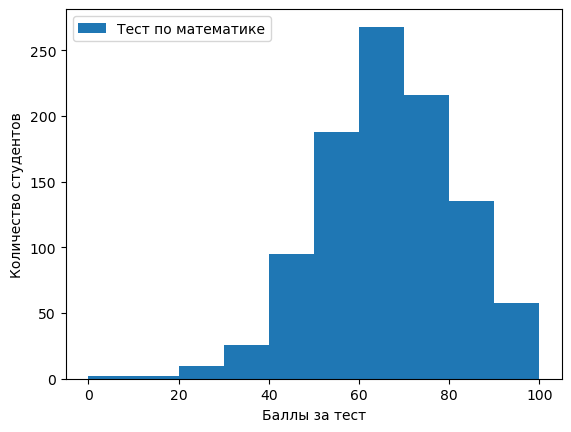

In [21]:
plt.hist(students["math score"], label="Тест по математике")
plt.xlabel("Баллы за тест")
plt.ylabel("Количество студентов")
plt.legend()
plt.show()

In [22]:
list1 = [
    '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/',
    ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|',
    '}', '~', "1", "2", "3", "4", "5", "6", "7", "8", "9", "0"
]


def length_stats(new):

    index1 = "".join(i for i in new if i not in list1).split(" ")
    index1 = sorted(list(set(j.lower() for j in index1)))
        
    return pd.Series(map(len, index1), index=index1, dtype="int64")

print(length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.'))

домик       5
зверушка    8
и           1
лес         3
опушка      6
странный    8
dtype: int64


In [23]:
products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)
print(price_list)

bread    37
milk     58
soda     99
cream    72
dtype: int64


In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/prvshnat/hsedata2425/refs/heads/main/data1.csv")
df

# DataFrame in pandas consists of series -- одиночным столбцам, признакам

,Date,Duration,Activity,Topics,AI,Age,Level
0,2023-10-28 00:56:18,3.28,Speaking,Future Plans and Goals; Leadership Skills and ...,True,48,Beginner
1,2023-02-22 01:55:58,8.56,Listening,Art and Creativity; Movies and Cinema; Travel ...,True,38,Intermediate
2,2023-01-15 07:31:29,0.57,Listening,Music and Performing Arts; History and Histori...,False,24,Beginner
3,2022-07-15 09:07:34,1.53,Writing,Religious Diversity and Tolerance; Philosophic...,True,52,Advanced
4,2024-11-13 08:52:04,3.89,Listening,Future Plans and Goals; Religious Practices an...,True,17,Intermediate
...,...,...,...,...,...,...,...
48908,2024-05-18 06:50:47,5.13,Reading,Philosophical Perspectives on Life; Agricultur...,True,37,Beginner
48909,2024-01-20 15:48:46,0.49,Speaking,Art and Its Therapeutic Benefits; Environment ...,True,29,Beginner
48910,2024-01-28 07:19:13,4.30,Listening,Architectural Innovations and Sustainability; ...,True,15,Intermediate
48911,2023-11-29 16:04:26,4.00,Reading,Agricultural Sustainability and Food Security;...,True,35,Intermediate


In [25]:
df.head(10)
df.tail(10)

# df.heac() -- первые 5 строк таблицы
# df.head(10) --  последние 5 строк таблицы

,Date,Duration,Activity,Topics,AI,Age,Level
48903,2023-05-15 13:59:00,3.59,Reading,Nature and Its Preservation; Entrepreneurial J...,True,55,Intermediate
48904,2023-06-18 18:49:30,8.23,Listening,Energy Transition and Renewables; Leadership a...,False,48,Intermediate
48905,2022-01-17 08:23:16,0.44,Listening,Art and Culture; Religious Practices and Their...,True,51,Intermediate
48906,2022-04-23 11:46:54,2.75,Writing,Language and Cultural Identity; Leadership Ski...,True,57,Intermediate
48907,2023-03-20 05:03:06,3.31,Speaking,Agricultural Sustainability and Food Security;...,True,48,Advanced
48908,2024-05-18 06:50:47,5.13,Reading,Philosophical Perspectives on Life; Agricultur...,True,37,Beginner
48909,2024-01-20 15:48:46,0.49,Speaking,Art and Its Therapeutic Benefits; Environment ...,True,29,Beginner
48910,2024-01-28 07:19:13,4.30,Listening,Architectural Innovations and Sustainability; ...,True,15,Intermediate
48911,2023-11-29 16:04:26,4.00,Reading,Agricultural Sustainability and Food Security;...,True,35,Intermediate
48912,2024-10-19 10:49:56,7.16,Speaking,Language and Its Cultural Significance; Educat...,True,15,Beginner


In [26]:
df['Topics']

# df['Topics'] -- вывод определенного столбца 

0        Future Plans and Goals; Leadership Skills and ...
1        Art and Creativity; Movies and Cinema; Travel ...
2        Music and Performing Arts; History and Histori...
3        Religious Diversity and Tolerance; Philosophic...
4        Future Plans and Goals; Religious Practices an...
                               ...                        
48908    Philosophical Perspectives on Life; Agricultur...
48909    Art and Its Therapeutic Benefits; Environment ...
48910    Architectural Innovations and Sustainability; ...
48911    Agricultural Sustainability and Food Security;...
48912    Language and Its Cultural Significance; Educat...
Name: Topics, Length: 48913, dtype: object

In [27]:
df.index

# df.index -- информация про индексы таблицы

RangeIndex(start=0, stop=48913, step=1)

In [28]:
df.loc[0]

# df.loc[0] -- обращение к определенной строке 

Date                                      2023-10-28 00:56:18
Duration                                                 3.28
Activity                                             Speaking
Topics      Future Plans and Goals; Leadership Skills and ...
AI                                                       True
Age                                                        48
Level                                                Beginner
Name: 0, dtype: object

In [29]:
df.loc[0, "Date"]
df.loc[0]["Topics"]

df.loc[0, ["Topics", "Date"]]
# три варианта обращения к определенному признаку в определенной строке 

Topics    Future Plans and Goals; Leadership Skills and ...
Date                                    2023-10-28 00:56:18
Name: 0, dtype: object

In [30]:
df.shape

# количество строк и столбцов 

(48913, 7)

In [31]:
df.dtypes

# какие форматы данных лежат в каждой из колонок 
# object -- может хранить смешанные типы данных, но чаще текстовая информация str
# bool -- логический тип данных, в признаке только два типа значений (True или False)
# int64 -- содержит только целые числа. 64 -- количество битов, которое отводится для хранения одного числа. 
# float64 -- содержит только десятичные числа -- есть дробная часть. 64 -- количество битов, которое отводится для хранения одного числа. 

Date         object
Duration    float64
Activity     object
Topics       object
AI             bool
Age           int64
Level        object
dtype: object

In [32]:
# Шкалы измерения признаков

# Все данные разделяются на 2 типа: количественные (числа) и категориальные (строковые значения)

# Количественные: дискретные (целые значения + ограниченный набор этих значений), непрерывные (принимает любые числовые значения: рост человека)

# Категориальные: порядковые (у них есть порядок: уровень образования), номинальные (нет порядка: цвет глаз): бинарные (True/False)

In [33]:
df.sort_values('Age', ascending=True)

# сортировка данных по убыванию/возрастанию

,Date,Duration,Activity,Topics,AI,Age,Level
42651,2024-07-28 07:02:33,15.28,Speaking,Global Sustainability Goals; Global Sustainabi...,True,10,Beginner
40644,2023-11-02 01:29:27,11.48,Speaking,Travel and Adventure; Energy Efficiency and Co...,True,10,Intermediate
46929,2024-12-11 00:52:16,0.82,Writing,Health and Wellness; Energy and Renewable Reso...,True,10,Beginner
17925,2024-08-22 08:30:00,2.34,Speaking,Travel Experiences; Future Plans and Goals; To...,False,10,Beginner
17959,2023-04-10 15:54:36,5.62,Listening,Philosophical Inquiry and Reflection; Entrepre...,False,10,Advanced
...,...,...,...,...,...,...,...
38865,2022-03-04 20:37:34,5.66,Listening,Religious Practices and Their Meaning; Languag...,False,59,Intermediate
11297,2022-05-16 01:09:22,1.55,Writing,Volunteer Work and Social Impact; Global Issue...,True,59,Intermediate
27979,2022-05-30 06:35:22,3.56,Reading,Books and Reading; Travel and Its Personal Gro...,True,59,Beginner
30272,2022-03-08 14:05:52,5.07,Writing,Travel and Adventure; Transportation and Commu...,True,59,Intermediate


In [34]:
df.sort_values(['Age', "Duration"], ascending=[True, False])

,Date,Duration,Activity,Topics,AI,Age,Level
27094,2023-10-06 08:22:37,18.32,Reading,Philosophical Inquiry and Reflection; Nature C...,True,10,Beginner
5050,2023-12-10 07:06:32,17.19,Reading,Historical Lessons and Modern Applications; Po...,True,10,Intermediate
22760,2024-02-20 16:37:14,16.63,Speaking,Tourism and Cultural Appreciation; Tourism and...,True,10,Beginner
772,2024-01-30 21:25:43,16.46,Reading,Water Conservation Strategies; Architectural D...,True,10,Intermediate
17413,2022-05-05 14:57:57,16.09,Reading,Travel and Personal Growth; Entrepreneurship a...,False,10,Beginner
...,...,...,...,...,...,...,...
7434,2023-10-28 03:56:26,0.20,Listening,Food and Cuisine; Hobbies and Interests; Natur...,True,59,Beginner
16721,2024-02-19 10:12:54,0.19,Listening,Science and Technological Advancements; Fashio...,True,59,Advanced
26119,2024-12-11 21:27:42,0.15,Listening,Philosophy and Ethics; Art and Creativity; Arc...,True,59,Intermediate
385,2022-02-02 17:10:23,0.14,Reading,Language and Its Cultural Significance; Transp...,True,59,Intermediate


In [35]:
df.iloc[0]

# отбирает строку по индексу как в списке, а не порадковому индексу из таблицы

Date                                      2023-10-28 00:56:18
Duration                                                 3.28
Activity                                             Speaking
Topics      Future Plans and Goals; Leadership Skills and ...
AI                                                       True
Age                                                        48
Level                                                Beginner
Name: 0, dtype: object

In [36]:
df[df["Age"] < 18]

,Date,Duration,Activity,Topics,AI,Age,Level
4,2024-11-13 08:52:04,3.89,Listening,Future Plans and Goals; Religious Practices an...,True,17,Intermediate
15,2023-06-18 19:20:12,3.46,Speaking,Cultural Heritage; Entrepreneurship and Innova...,True,12,Beginner
17,2024-03-03 17:20:05,4.69,Writing,Religious Tolerance and Coexistence; Cultural ...,True,11,Intermediate
22,2022-08-11 17:21:55,0.85,Speaking,Historical Events and Their Lessons; Leadershi...,True,11,Beginner
37,2022-03-03 08:29:00,2.87,Writing,Future Plans and Goals; Leadership and Teamwor...,True,12,Beginner
...,...,...,...,...,...,...,...
48876,2022-01-20 17:33:14,7.08,Speaking,Entrepreneurial Journeys and Challenges; Relig...,True,15,Advanced
48879,2024-11-03 16:57:04,1.82,Listening,Entrepreneurial Ventures and Startups; Energy ...,True,12,Beginner
48881,2023-04-05 08:16:16,2.58,Reading,Travel and Cultural Understanding; Leadership ...,True,15,Intermediate
48910,2024-01-28 07:19:13,4.30,Listening,Architectural Innovations and Sustainability; ...,True,15,Intermediate


In [37]:
df[df["Activity"] == "Listening"]

# фильтрация 

,Date,Duration,Activity,Topics,AI,Age,Level
1,2023-02-22 01:55:58,8.56,Listening,Art and Creativity; Movies and Cinema; Travel ...,True,38,Intermediate
2,2023-01-15 07:31:29,0.57,Listening,Music and Performing Arts; History and Histori...,False,24,Beginner
4,2024-11-13 08:52:04,3.89,Listening,Future Plans and Goals; Religious Practices an...,True,17,Intermediate
11,2023-02-21 02:08:43,6.12,Listening,Entrepreneurial Mindset and Success; Tourism a...,True,33,Beginner
12,2023-10-31 11:17:06,10.27,Listening,Technology and Gadgets; Nature and Its Preserv...,True,45,Beginner
...,...,...,...,...,...,...,...
48887,2022-02-23 03:09:13,2.10,Listening,NaN,True,41,Beginner
48894,2024-10-11 15:03:08,4.72,Listening,Art and Its Social Impact; Energy Efficiency M...,True,42,Advanced
48904,2023-06-18 18:49:30,8.23,Listening,Energy Transition and Renewables; Leadership a...,False,48,Intermediate
48905,2022-01-17 08:23:16,0.44,Listening,Art and Culture; Religious Practices and Their...,True,51,Intermediate


In [38]:
df[df["Activity"] == "Listening"].shape[0]

19477

In [39]:
# Использование операторвов &, |

df[(df["Activity"] == "Listening") | (df["Level"] == "Beginner")]

,Date,Duration,Activity,Topics,AI,Age,Level
0,2023-10-28 00:56:18,3.28,Speaking,Future Plans and Goals; Leadership Skills and ...,True,48,Beginner
1,2023-02-22 01:55:58,8.56,Listening,Art and Creativity; Movies and Cinema; Travel ...,True,38,Intermediate
2,2023-01-15 07:31:29,0.57,Listening,Music and Performing Arts; History and Histori...,False,24,Beginner
4,2024-11-13 08:52:04,3.89,Listening,Future Plans and Goals; Religious Practices an...,True,17,Intermediate
5,2024-01-08 16:56:38,5.69,Speaking,Travel and Personal Growth; Leadership and Dec...,True,30,Beginner
...,...,...,...,...,...,...,...
48905,2022-01-17 08:23:16,0.44,Listening,Art and Culture; Religious Practices and Their...,True,51,Intermediate
48908,2024-05-18 06:50:47,5.13,Reading,Philosophical Perspectives on Life; Agricultur...,True,37,Beginner
48909,2024-01-20 15:48:46,0.49,Speaking,Art and Its Therapeutic Benefits; Environment ...,True,29,Beginner
48910,2024-01-28 07:19:13,4.30,Listening,Architectural Innovations and Sustainability; ...,True,15,Intermediate


In [40]:
df[df["Activity"].isin(["Listening", "Reading"])]

# .isin() выводит все стрки со значениями в заданном признаке (если использвать чисто .isin(), то выйдет True/False)

,Date,Duration,Activity,Topics,AI,Age,Level
1,2023-02-22 01:55:58,8.56,Listening,Art and Creativity; Movies and Cinema; Travel ...,True,38,Intermediate
2,2023-01-15 07:31:29,0.57,Listening,Music and Performing Arts; History and Histori...,False,24,Beginner
4,2024-11-13 08:52:04,3.89,Listening,Future Plans and Goals; Religious Practices an...,True,17,Intermediate
6,2022-04-13 16:06:24,1.29,Reading,Fashion and Its Environmental Impact; Energy T...,True,48,Advanced
11,2023-02-21 02:08:43,6.12,Listening,Entrepreneurial Mindset and Success; Tourism a...,True,33,Beginner
...,...,...,...,...,...,...,...
48904,2023-06-18 18:49:30,8.23,Listening,Energy Transition and Renewables; Leadership a...,False,48,Intermediate
48905,2022-01-17 08:23:16,0.44,Listening,Art and Culture; Religious Practices and Their...,True,51,Intermediate
48908,2024-05-18 06:50:47,5.13,Reading,Philosophical Perspectives on Life; Agricultur...,True,37,Beginner
48910,2024-01-28 07:19:13,4.30,Listening,Architectural Innovations and Sustainability; ...,True,15,Intermediate


In [41]:
df[df["Duration"].between(1, 3)]

# количество уроков, которые были в диапазоне от 1 до 3 часов 

df[(df["Duration"] >= 1) & (df["Duration"] <=3)]

,Date,Duration,Activity,Topics,AI,Age,Level
3,2022-07-15 09:07:34,1.53,Writing,Religious Diversity and Tolerance; Philosophic...,True,52,Advanced
6,2022-04-13 16:06:24,1.29,Reading,Fashion and Its Environmental Impact; Energy T...,True,48,Advanced
8,2024-06-16 04:15:49,2.05,Speaking,Language and Its Cultural Significance; Future...,True,32,Beginner
18,2022-04-12 21:19:29,2.40,Listening,Science and Its Ethical Considerations; Fashio...,True,33,Intermediate
21,2022-07-10 08:01:02,1.90,Writing,Religious Diversity and Tolerance; Leisure and...,False,47,Intermediate
...,...,...,...,...,...,...,...
48892,2024-04-25 11:03:25,1.64,Reading,Work and Career; Fashion and Its Environmental...,True,41,Intermediate
48893,2022-04-14 08:45:07,2.55,Speaking,Leadership and Management,False,35,Beginner
48899,2023-12-05 11:38:06,1.96,Reading,Fashion and Fashion Industry; Daily Routine an...,True,47,Intermediate
48901,2024-12-27 13:53:24,2.17,Reading,Energy and Renewable Resources; Technology and...,True,27,Intermediate


In [42]:
import pandas as pd


def length_stats(new):


    pre_final = "".join(i.lower() if i.isalpha() or i == " " else " " for i in new).split(" ")
    final = sorted(list(set(pre_final)))
    
    # final_series = pd.Series(map(len, final), index=final, dtype="int64")
    
    # even = final_series[final_series % 2 == 0]
    # odd = final_series[final_series % 2 != 0]
    
    return final


print(length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.'))

# odd, even = length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.')
# print(odd)
# print(even)

['', 'домик', 'зверушка', 'и', 'лес', 'опушка', 'странный']


In [43]:
import pandas as pd


def cheque(price_list, **kwargs):

    new = {
        "product": list(sorted(kwargs.keys())),
        "price": [],
        "number": []
    }

    for i in new["product"]:
        new["price"] += [price_list[i]]
        new["number"] += [kwargs[i]]  

    new["cost"] = (x * y for x, y in zip(new["price"], new["number"]))

    final = pd.DataFrame(new)
    
    return final
    

products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)
result = cheque(price_list, soda=3, milk=2, cream=1)
print(result)

  product  price  number  cost
0   cream     72       1    72
1    milk     58       2   116
2    soda     99       3   297


In [44]:
import pandas as pd 


def cheque(price_list, **kwargs):

    new = {
        "product": list(sorted(kwargs.keys())),
        "price": [],
        "number": []
    }

    for i in new["product"]:
        new["price"] += [price_list[i]]
        new["number"] += [kwargs[i]]  

    new["cost"] = (x * y for x, y in zip(new["price"], new["number"]))
    
    return pd.DataFrame(new)
    


def discount(var):

    copy = dict(var)
    
    copy["cost"] = [i / 2 if j > 2 else i for j, i in zip(copy["number"], copy["cost"])]
    
    return pd.DataFrame(copy)


products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)
result = cheque(price_list, soda=3, milk=2, cream=1)
with_discount = discount(result)
print(result)
print(with_discount)

  product  price  number  cost
0   cream     72       1    72
1    milk     58       2   116
2    soda     99       3   297
  product  price  number   cost
0   cream     72       1   72.0
1    milk     58       2  116.0
2    soda     99       3  148.5


In [45]:
import pandas as pd 


def cheque(price_list, **kwargs):

    new = {
        "product": list(sorted(kwargs.keys())),
        "price": [],
        "number": []
    }

    for i in new["product"]:
        new["price"] += [price_list[i]]
        new["number"] += [kwargs[i]]  

    new["cost"] = (x * y for x, y in zip(new["price"], new["number"]))
    
    return pd.DataFrame(new)
    


def discount(var):
    copy = pd.DataFrame(dict(var))
    
    new = copy.loc[cheque['number'] > 2]
    
    return new


products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)
result = cheque(price_list, soda=3, milk=2, cream=1)
with_discount = discount(result)
print(result)
print(with_discount)

TypeError: 'function' object is not subscriptable